In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation


In [2]:
#Reading the data file
df = pd.read_csv("/content/DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [3]:
#here we clean the data
print(df.head())
print(df.info())
print(df.describe())
print(df.shape) #returns a tuple with the details number of rows and columns
print(df.columns) # returns array of columns in dataset
df.info()       # returns the information about the dataset
df.isnull().sum()       # isnull returns the True/False dataframe
df.fillna(method='ffill', inplace=True)  # Example: forward fill
#convert data types
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['is_canceled'] = df['is_canceled'].astype(bool)
df['adr'] = df['adr'].astype(float)
#handle duplicates
df.drop_duplicates(inplace=True)
#standarize column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
#address outliers
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['adr'] >= (Q1 - 1.5 * IQR)) & (df['adr'] <= (Q3 + 1.5 * IQR))]
#categorical variables
df = pd.get_dummies(df, columns=['hotel', 'deposit_type', 'customer_type'], drop_first=True)
#Reformat names
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y')
#Final inspection
print(df.info())
print(df.describe())
df.to_csv('cleaned_hotel_data.csv', index=False)

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         68               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         10               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            0         51               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          2   
2                        27                          3   
3                        27                          3   
4                        28                          6   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     4       2  ...    No Deposit   
1     

<ipython-input-3-5f5a05bdf6ee>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: forward fill


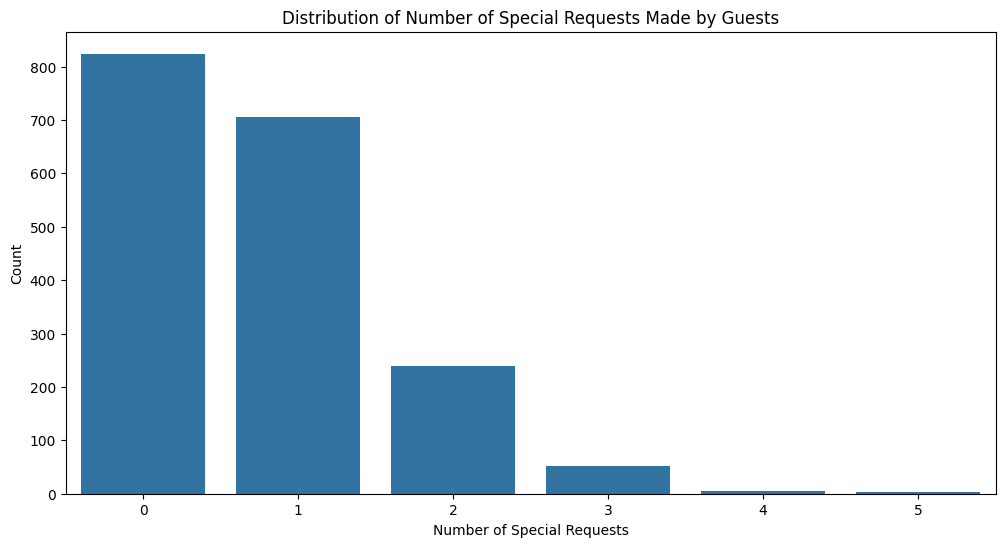

In [5]:
#task1.1:Distribution of Special Requests
# Distribution of the number of special requests
plt.figure(figsize=(12, 6))
sns.countplot(x='total_of_special_requests', data=df)
plt.title('Distribution of Number of Special Requests Made by Guests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()





In [ ]:
#Interpretation:the histogram shows that most guests do not make any special requests, and the number of special requests made generally decreases as the number of requests increases. There are a few guests who make a significantly higher number of special requests, creating a skewed distribution.

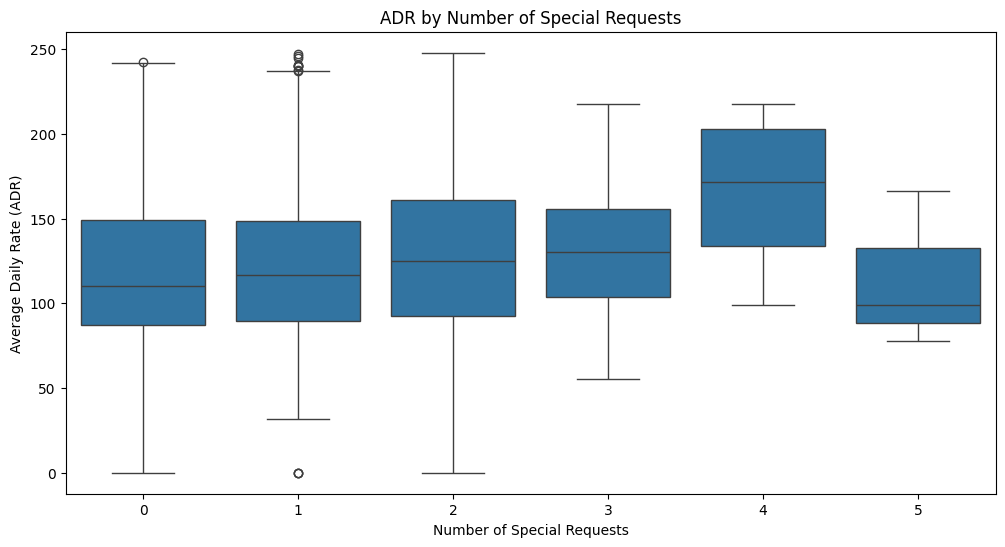

Correlation between total special requests and ADR: 0.10


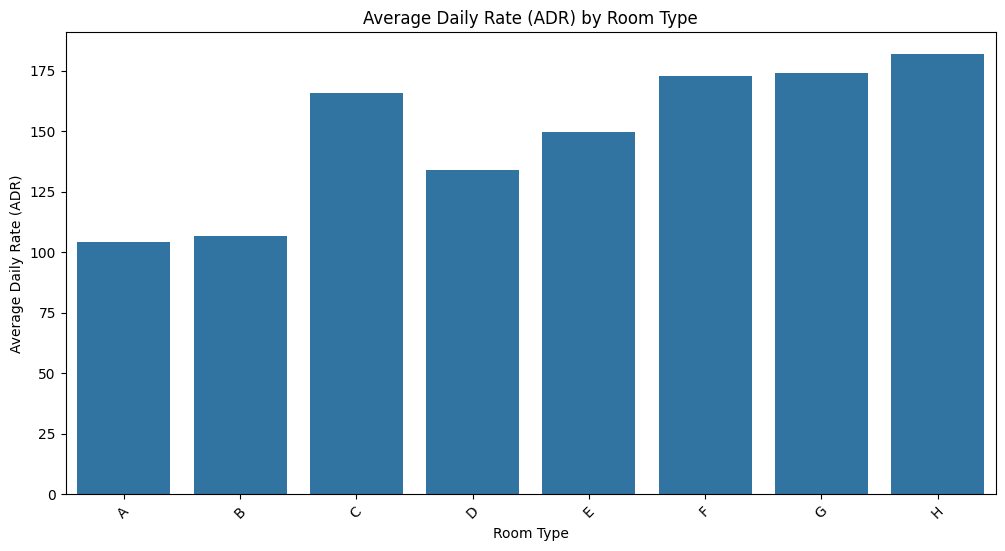

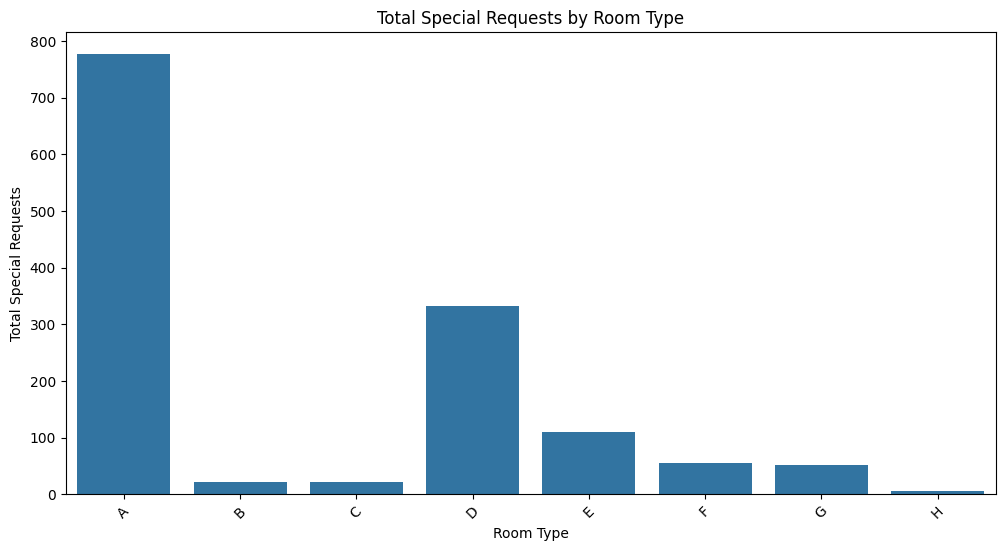

In [6]:
#task1.2:Relationship Between Special Requests and Average Daily Rate (ADR)&Customer Preferences and Expectations for Different Room Types
# Analyzing the relationship between special requests and ADR
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title('ADR by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Calculate correlation
correlation = df[['total_of_special_requests', 'adr']].corr().iloc[0, 1]
print(f"Correlation between total special requests and ADR: {correlation:.2f}")

room_summary = df.groupby('reserved_room_type').agg(
    avg_adr=('adr', 'mean'),
    total_requests=('total_of_special_requests', 'sum'),
    count=('reserved_room_type', 'count')
).reset_index()

# Plotting room type preferences
plt.figure(figsize=(12, 6))
sns.barplot(x='reserved_room_type', y='avg_adr', data=room_summary)
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Total special requests by room type
plt.figure(figsize=(12, 6))
sns.barplot(x='reserved_room_type', y='total_requests', data=room_summary)
plt.title('Total Special Requests by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Special Requests')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#interpretation: the bar chart shows that Room Type A and B are the most popular room types in terms of special requests, while the other room types have a much lower demand for special requests.

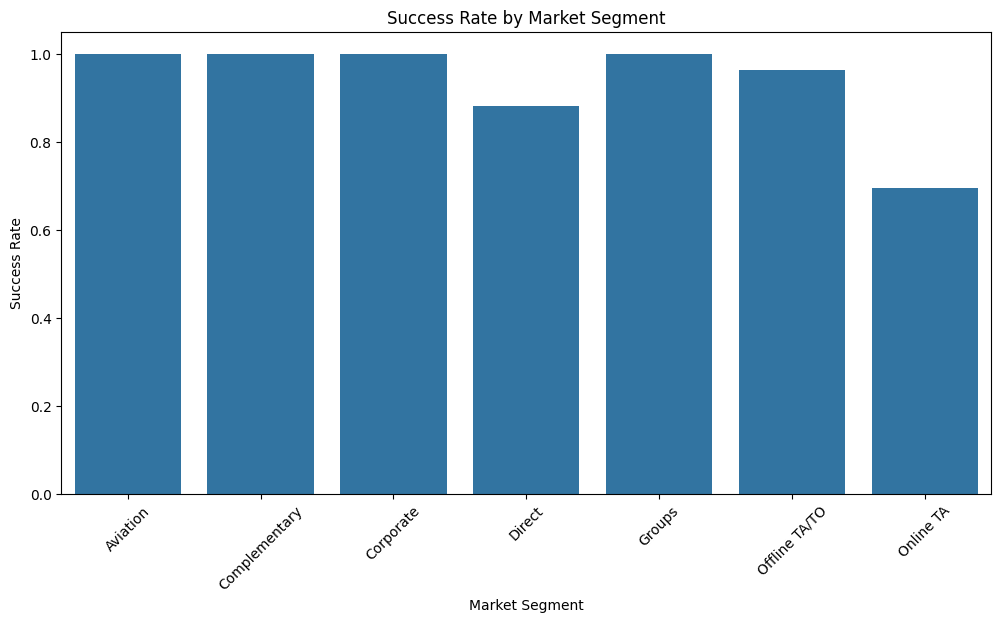

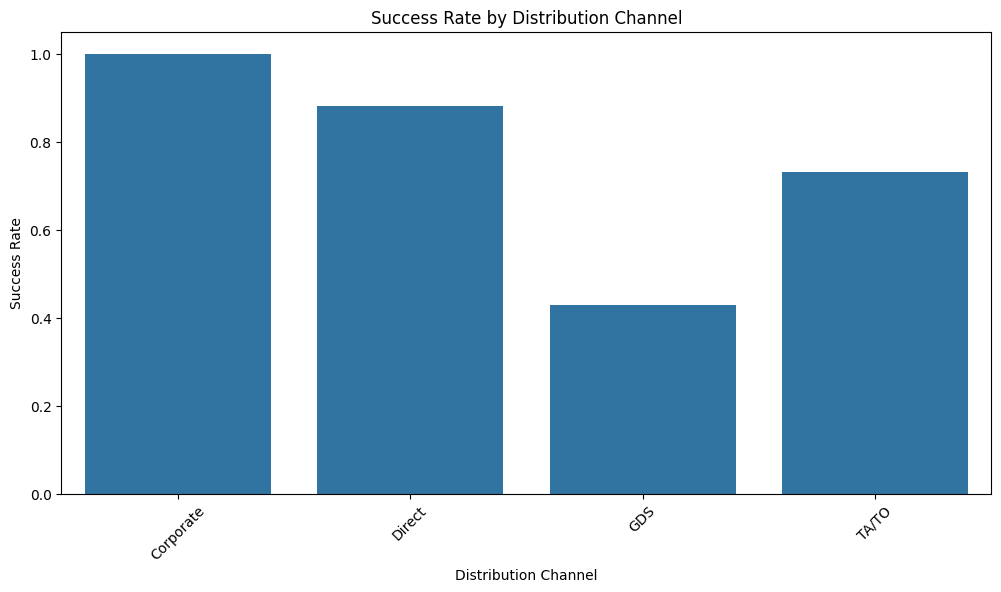

In [7]:
#task2.1:Marketing Channels and Market Segments Contribution
# Assuming 'market_segment' and 'distribution_channel' are your columns
# and 'is_canceled' indicates successful bookings (0 for not canceled, 1 for canceled)

# Success rate by market segment
market_segment_summary = df.groupby('market_segment').agg(
    success_rate=('is_canceled', lambda x: (x == 0).mean()),
    total_bookings=('is_canceled', 'count')
).reset_index()

# Success rate by distribution channel
channel_summary = df.groupby('distribution_channel').agg(
    success_rate=('is_canceled', lambda x: (x == 0).mean()),
    total_bookings=('is_canceled', 'count')
).reset_index()

# Plotting success rates
plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='success_rate', data=market_segment_summary)
plt.title('Success Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='success_rate', data=channel_summary)
plt.title('Success Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Interpretation:Highest Success Rate: The "Corporate" channel has the highest success rate, with a value close to 1.0. This suggests that bookings made through the corporate channel are highly likely to be successful.
#Lowest Success Rate: The "GDS" channel has the lowest success rate, with a value around 0.4. This indicates that bookings made through GDS are less likely to be successful compared to other channels.
#Other Channels: The "Direct" and "TA/TO" channels have success rates between "Corporate" and "GDS." "Direct" has a slightly higher success rate than "TA/TO."

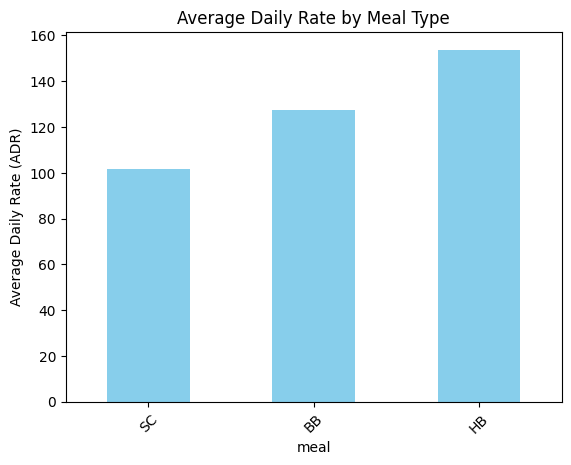

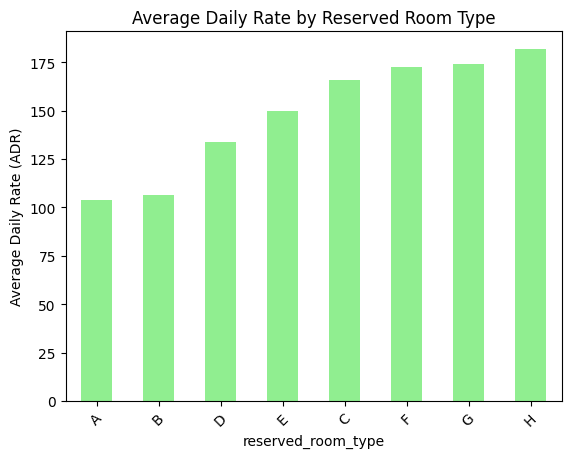

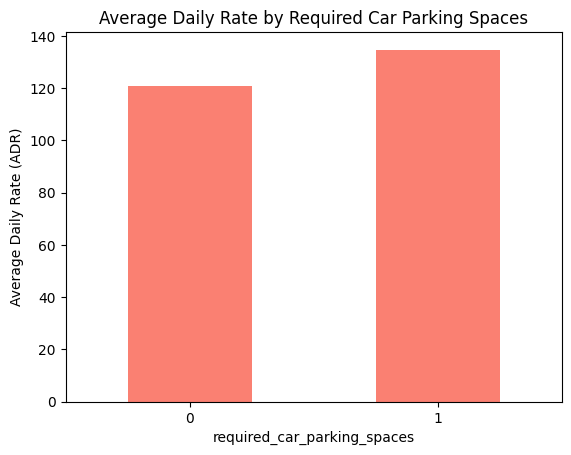

In [8]:
#task2.2:Amenities or Services Impact on ADR
# Group by 'meal' and calculate the average ADR
meal_adr = df.groupby('meal')['adr'].mean().sort_values()
meal_adr.plot(kind='bar', title='Average Daily Rate by Meal Type', color='skyblue')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Group by 'reserved_room_type' and calculate the average ADR
room_type_adr = df.groupby('reserved_room_type')['adr'].mean().sort_values()
room_type_adr.plot(kind='bar', title='Average Daily Rate by Reserved Room Type', color='lightgreen')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Group by 'required_car_parking_spaces' and calculate the average ADR
parking_adr = df.groupby('required_car_parking_spaces')['adr'].mean()
parking_adr.plot(kind='bar', title='Average Daily Rate by Required Car Parking Spaces', color='salmon')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Interpretation:the bar chart shows that the ADR charged for different meal plans varies significantly, with the HB meal plan being the most expensive. This suggests that guests who opt for the HB meal plan are willing to pay a premium for the additional meal options included in the package.
# Room Type A has the lowest ADR, while Room Type H has the highest ADR. The other room types have ADRs that fall within a narrower range.
#the bar chart shows that requiring a car parking space increases the average daily rate charged to guests. This suggests that the availability of car parking is a valuable amenity that can command a premium price.

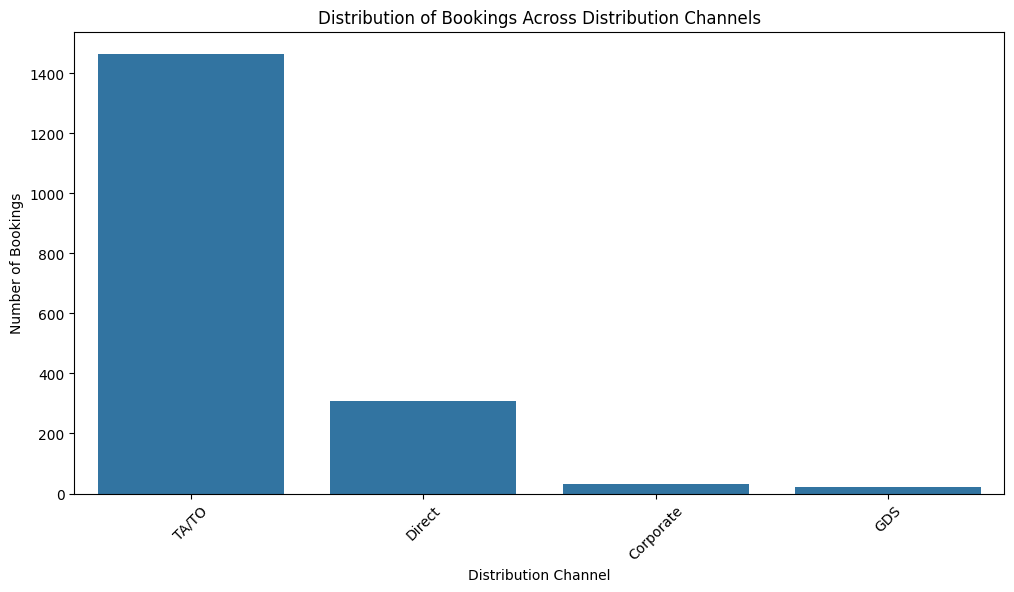

In [ ]:
#task2.3:Distribution of Bookings Across Channels
# Distribution of bookings by channel
plt.figure(figsize=(12, 6))
sns.countplot(x='distribution_channel', data=df)
plt.title('Distribution of Bookings Across Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#interpretation: the bar chart shows that "TA/TO" and "Direct" are the most popular distribution channels for making bookings at this hotel. While "Corporate" and "GDS" are still used, they have a lower market share.